ay

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
import pandas as pd

1.读入Blanck asc data

2.计算Blank mean

3.读入Sample data

4.计算Sample-Blank

5.计算ay

$$
a_{y}=\frac{2.303}{0.1}(Sample_Blank-Sample_Blank(Refwave))
$$

6.计算ay mean

7.画图 输出ay(440)和Slope

In [2]:
b3=pd.read_csv('/Users/zhenjia/Desktop/Airka Reprocess/Ariake/2015/2015.08.06/ay/C0806-B3.ASC',names=['wave','Blank'])

In [3]:
Blank1=b3['Blank'].to_numpy()

In [4]:
Blank1

array([0.1343, 0.1345, 0.1352, 0.1364, 0.1374, 0.138 , 0.1391, 0.1402,
       0.1409, 0.1418, 0.1427, 0.1438, 0.1449, 0.1458, 0.1469, 0.148 ,
       0.1489, 0.1499, 0.1508, 0.1515, 0.1522, 0.1533, 0.154 , 0.1549,
       0.1557, 0.1562, 0.1571, 0.1579, 0.1587, 0.1591, 0.1592, 0.1597,
       0.1607, 0.1609, 0.1614, 0.1616, 0.1618, 0.1621, 0.1625, 0.1628,
       0.1627, 0.1632, 0.1631, 0.1634, 0.1635, 0.1638, 0.1638, 0.1636,
       0.1638, 0.164 , 0.1638, 0.1637, 0.1638, 0.1639, 0.1638, 0.164 ,
       0.164 , 0.1638, 0.1635, 0.1632, 0.1625, 0.1613, 0.1599, 0.158 ,
       0.1557, 0.1523, 0.1487, 0.1444, 0.1392, 0.1342, 0.1285, 0.1236,
       0.1189, 0.1151, 0.1114, 0.1082, 0.1053, 0.1026, 0.1001, 0.0977,
       0.0952, 0.0934, 0.0912, 0.0892, 0.087 , 0.085 , 0.083 , 0.0811,
       0.0798, 0.0782, 0.0768, 0.0757, 0.0745, 0.0736, 0.0723, 0.0717,
       0.0707, 0.0699, 0.0693, 0.0685, 0.0678, 0.0672, 0.0663, 0.0658,
       0.0652, 0.0649, 0.0643, 0.0639, 0.0635, 0.0631, 0.0627, 0.0623,
      

In [5]:
b4=pd.read_csv('/Users/zhenjia/Desktop/Airka Reprocess/Ariake/2015/2015.08.06/ay/C0806-B4.ASC',names=['wave','Blank'])
Blank4=b4['Blank'].to_numpy()


b5=pd.read_csv('/Users/zhenjia/Desktop/Airka Reprocess/Ariake/2015/2015.08.06/ay/C0806-B5.ASC',names=['wave','Blank'])
Blank5=b5['Blank'].to_numpy()


b6=pd.read_csv('/Users/zhenjia/Desktop/Airka Reprocess/Ariake/2015/2015.08.06/ay/C0806-B6.ASC',names=['wave','Blank'])
Blank6=b6['Blank'].to_numpy()


In [6]:
b_tot=np.asarray([Blank1,Blank4,Blank5,Blank6])
np.shape(b_tot)

(4, 501)

In [7]:
Mean_blank=np.mean(b_tot,axis=0)
np.shape(Mean_blank)

(501,)

In [8]:
s1=pd.read_csv('/Users/zhenjia/Desktop/Airka Reprocess/Ariake/2015/2015.08.06/ay/C0806-S1.ASC',
                  names=['wave','data'])
S1=s1['data'].to_numpy()

In [9]:
s2=pd.read_csv('/Users/zhenjia/Desktop/Airka Reprocess/Ariake/2015/2015.08.06/ay/C0806-S2.ASC',
                  names=['wave','data'])
S2=s2['data'].to_numpy()

In [10]:
S1b=S1-Mean_blank
S2b=S2-Mean_blank

In [11]:
ay1=(2.303/0.1)*(S1b-S1b[50])

In [12]:
ay2=(2.303/0.1)*(S2b-S2b[50])

In [13]:
ay=np.mean([ay1,ay2],axis=0)

In [14]:
np.shape(ay)

(501,)

In [15]:
wave=s2['wave'].to_numpy()

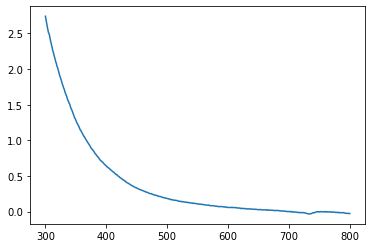

In [16]:
plt.plot(wave,ay)

In [17]:
ay[50]

0.0

In [18]:
find = lambda k, wavelength: np.abs(wavelength - k).argmin()  # Index of closest wavelength
key = lambda k, wavelength: wavelength[find(k, wavelength)]  # Value of closest wavelength

In [22]:
ay440=ay[find(440,wave)]

In [ ]:
def exp():
    